## Frauenanteil der Bevölkerung zwischen 1960 und 2022

 Gruppe: Miranda Downing, Elena Buchli

 Fragen: 
 
 -In welchen Ländern ist der Bevölkerungsanteil der Frauen zwischen 1960 und 2022 am meisten gesunken oder gestiegen?
 
 -Welche Gründe gibt es für die Veränderungen?

 Quellen:
 
 https://ourworldindata.org/gender-ratio

### 1. Daten beschaffen und laden


In [18]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('share-population-female.csv', skiprows=1,
                 names=['Gebiet','Code','Jahr','Anteil Population weiblich in %']) 
df.head()  

,Gebiet,Code,Jahr,Anteil Population weiblich in %
0,Afghanistan,AFG,1960,48.083054
1,Afghanistan,AFG,1961,48.165000
2,Afghanistan,AFG,1962,48.242370
3,Afghanistan,AFG,1963,48.315890
4,Afghanistan,AFG,1964,48.385273


### 2. Daten vorbereiten

Welches Format hat mein Datensatz bzw. wie sind meine Kolumnen strukturiert?
-> Der Datensatz ist bereits im Longformat.
Welches Format kann ich für welche Teilschritte verwenden (wann soll ich pivot bzw. wide format verwenden)?
-> Für die Analyse werden die Daten pivotiert. Jede Zeile beschreibt die Daten eines Gebiets. Jede Spalte die Daten des entsprechenden Jahres in aufsteigender Reihenfolge.
Welche Datentypen kommen in meinem Datensatz vor?
-> Folgende Datentypen kommen in unserem Datentyp vor: Gebiet und Code = Object, Jahr = Integer, Anteil Population weiblich in % = Float


In [4]:
df_pivot = df.pivot(index='Gebiet', columns='Jahr', values='Anteil Population weiblich in %')
df_pivot.head()

Jahr,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Gebiet,,,,,,,,,,,,,,,,,,,,,
Afghanistan,48.083054,48.165000,48.242370,48.315890,48.385273,48.450287,48.511803,48.570465,48.626003,48.677998,...,49.442104,49.432137,49.423183,49.414608,49.419285,49.437210,49.455486,49.470943,49.488403,49.508720
Albania,48.797123,48.769444,48.734352,48.691364,48.642930,48.592712,48.542490,48.491707,48.440876,48.390232,...,49.840595,49.837696,49.842410,49.856564,49.878532,49.906067,49.939330,49.988052,50.049040,50.117737
Algeria,49.568150,49.549220,49.444250,49.317616,49.144753,48.956123,48.868008,48.871320,48.872444,48.872456,...,49.024277,49.030834,49.037370,49.041508,49.044548,49.048107,49.053470,49.063175,49.075874,49.085533
American Samoa,48.648247,48.671580,48.716620,48.763042,48.812675,48.882050,48.926292,48.941566,48.972977,49.037730,...,49.757523,49.824768,49.892930,49.968285,50.061660,50.161076,50.265210,50.375630,50.507380,50.592910
Andorra,49.454624,49.236492,49.046670,48.847030,48.660362,48.492220,48.301937,48.034298,47.754550,47.520190,...,49.496265,49.528770,49.559560,49.507860,49.373620,49.248800,49.123035,49.014156,48.932106,48.905090


### 3. Statistik der Rohdaten (Analyse im Long-Format)
Ist meine Variable kontinuierlich oder diskret?
Falls diskret, wieviele einzigartige Klassen gibt es? 
Wieviele Datenpunkte pro Klasse sind vorhanden?
Anzahl Datenpunkte (Beschreibend und Graphische Darstellung)
Wieviele Datenpunkte sind für die bestimmten Variabeln vorhanden?
Wo fehlen Datenpunkte?
Wie ist die Verteilung der zu untersuchenden Variabel(n) (Histogram, Boxplot, Säulendiagram)
Vermutest du Zusammenhänge zwischen zwei Variabeln (Streuungsdiagramm, Korrelationsmatrix)
Notiz: Zu jeder Kolumne sollte generell eine Aussage möglich sein.

Über die einzelnen Spalten kann folgendes ausgesagt werden:
- Die Spalte Gebiete enthält 231 verschieden Gebiete
- Die Spalte Codes enthält 218 verschiedene Codes
- Es sind Daten zwischen 1960 and 2022 vollständig von allen Gebieten vorhanden.
- Der weibliche Anteil der Population streut zwischen 23.4% und 55.9%.

In [6]:
df.dtypes

Gebiet                              object
Code                                object
Jahr                                 int64
Anteil Population weiblich in %    float64
dtype: object

#### 3.1 Analyse der Gebiete

In [7]:
print('Anzahl verschiedener Gebiete: ', len(df['Gebiet'].unique()))

Anzahl verschiedener Gebiete:  231


In [9]:
df['Gebiet'].value_counts()

Gebiet
Afghanistan      63
Nauru            63
Netherlands      63
New Caledonia    63
New Zealand      63
                 ..
Greenland        63
Grenada          63
Guam             63
Guatemala        63
Zimbabwe         63
Name: count, Length: 231, dtype: int64

<Axes: title={'center': 'Anzahl Datenpunkte pro Gebiet'}, xlabel='Gebiet', ylabel='Anzahl Datenpunkte'>

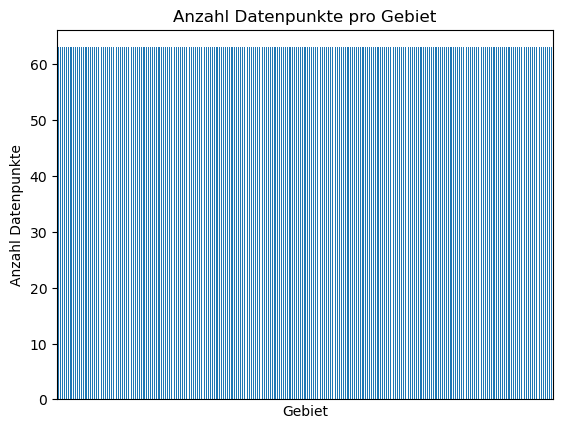

In [10]:
df['Gebiet'].value_counts().plot(kind='bar', 
                                 xticks=[],
                                 ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Gebiet')

#### 3.2 Anzahl der Codes

In [8]:
print('Anzahl verschiedene Codes: ', len(df['Code'].unique()))

Anzahl verschiedene Codes:  218


In [11]:
df['Code'].value_counts()

Code
AFG    63
PLW    63
NCL    63
NZL    63
NIC    63
       ..
GRC    63
GRL    63
GRD    63
GUM    63
ZWE    63
Name: count, Length: 217, dtype: int64

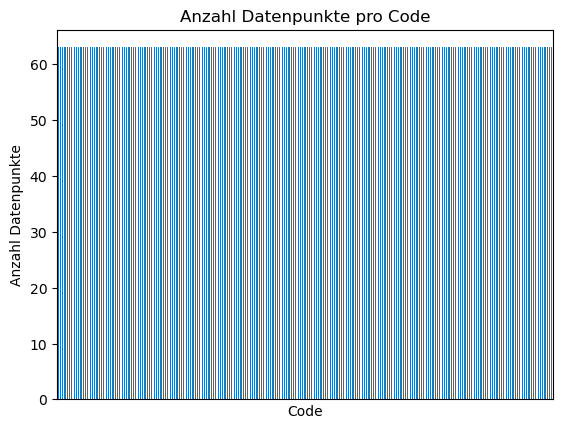

In [12]:
df['Code'].value_counts().plot(kind='bar',xticks=[], ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Code');

#### 3.3 Analyse der Jahre

In [13]:
print('Anzahl verschiedener Jahre: ', len(df['Jahr'].unique()))

Anzahl verschiedener Jahre:  63


In [14]:
df['Jahr'].value_counts().sort_index()

Jahr
1960    231
1961    231
1962    231
1963    231
1964    231
       ... 
2018    231
2019    231
2020    231
2021    231
2022    231
Name: count, Length: 63, dtype: int64

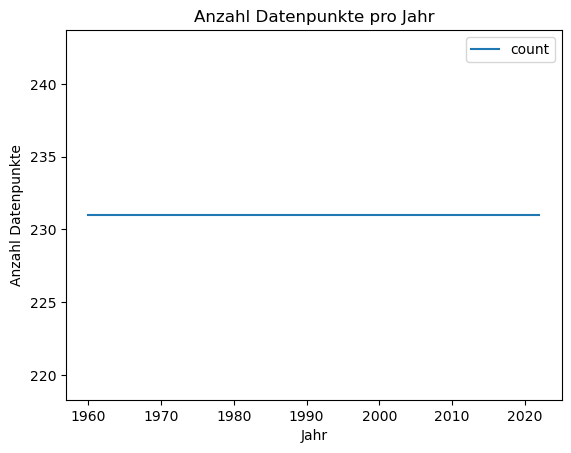

In [15]:
g = df['Jahr'].value_counts().sort_index().plot(ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Jahr');
g.legend()

#### 3.4 Analyse des weiblichen Anteils der Population in %

In [17]:
df.describe()

,Jahr,Anteil Population weiblich in %
count,14553.000000,14553.000000
mean,1991.000000,50.053526
std,18.184867,2.499612
min,1960.000000,23.394217
25%,1975.000000,49.492176
50%,1991.000000,50.317974
75%,2007.000000,51.123978
max,2022.000000,55.943850


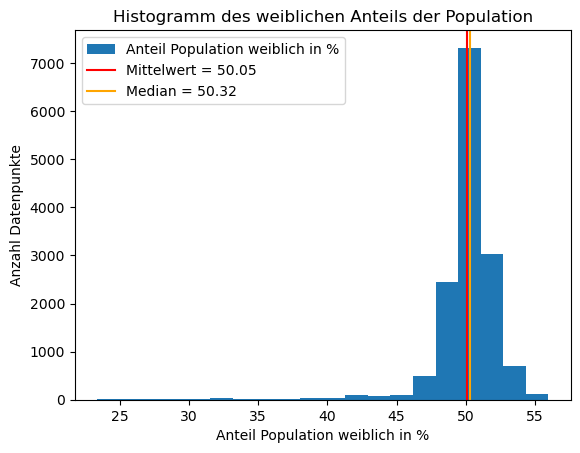

In [19]:
g = df['Anteil Population weiblich in %'].plot(kind='hist', bins=20, title='Histogramm des weiblichen Anteils der Population', 
                           xlabel='Anteil Population weiblich in %', ylabel='Anzahl Datenpunkte')
mean = df['Anteil Population weiblich in %'].mean()
g.axvline(x=df['Anteil Population weiblich in %'].mean(), color='red',label=f'Mittelwert = {mean:.2f}')  # rote Linie bei Mittelwert

median = df['Anteil Population weiblich in %'].median()
g.axvline(x=df['Anteil Population weiblich in %'].median(), color='orange',label=  f'Median = {median:.2f}')  # orange Linie bei Median

g.legend()

### 4. Analyse
Vorgehen
Spezifische Untersuchung der Fragestellung (Berechnungen)
Visualisieren der Resultate: Verwendet Achsenbeschriftung und überlegt euch, welche Art von Darstellung sinnvoll ist (Kuchen-, Säulen, Liniendiagramm; 2 y-Achsen?)
Beschreiben der Beobachtungen
Interpretation der Resultate (Hypothesen zu den Resultaten)
Untermauern der Interpretation mittels Hinweise zur Literatur (Mögliche Zusammenhänge aufzeigen).